In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import cv2

In [15]:
df = pd.read_csv('D:\mlproject\milk10k\Tabular_data.csv')

In [16]:
df.head()

,age_approx,anatom_site_general,concomitant_biopsy,diagnosis_confirm_type,image_manipulation,image_type,sex,target
0,70.0,3,1,0,1,1,1,1
1,5.0,0,1,0,1,1,0,0
2,10.0,3,1,0,1,0,0,0
3,50.0,0,1,0,1,1,0,1
4,75.0,0,1,0,1,1,1,1


In [17]:
X = df.drop(columns=['target'])
y = df['target']

In [18]:
X

,age_approx,anatom_site_general,concomitant_biopsy,diagnosis_confirm_type,image_manipulation,image_type,sex
0,70.0,3,1,0,1,1,1
1,5.0,0,1,0,1,1,0
2,10.0,3,1,0,1,0,0
3,50.0,0,1,0,1,1,0
4,75.0,0,1,0,1,1,1
...,...,...,...,...,...,...,...
10475,60.0,0,1,0,1,0,1
10476,80.0,3,1,0,1,1,1
10477,55.0,3,1,0,1,0,1
10478,75.0,0,1,0,1,0,0


In [19]:
y

0        1
1        0
2        0
3        1
4        1
        ..
10475    1
10476    0
10477    0
10478    1
10479    0
Name: target, Length: 10480, dtype: int64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
print(f"Training shapes: X={X_train.shape}, y={y_train.shape}")
print(f"Testing shapes: X={X_test.shape}, y={y_test.shape}")

Training shapes: X=(8384, 7), y=(8384,)
Testing shapes: X=(2096, 7), y=(2096,)


In [22]:
model = DecisionTreeClassifier(
    criterion='entropy',       
    splitter='best',
    max_depth=5,              
    min_samples_split=10,      
    min_samples_leaf=5,         
    max_features=None,          
    random_state=42            
)
model.fit(X_train, y_train)
print("Model Trained Successfully!")
print(f"Training Accuracy: {model.score(X_train, y_train):.2%}")
print(f"Test Accuracy:     {model.score(X_test, y_test):.2%}")

Model Trained Successfully!
Training Accuracy: 77.80%
Test Accuracy:     77.81%


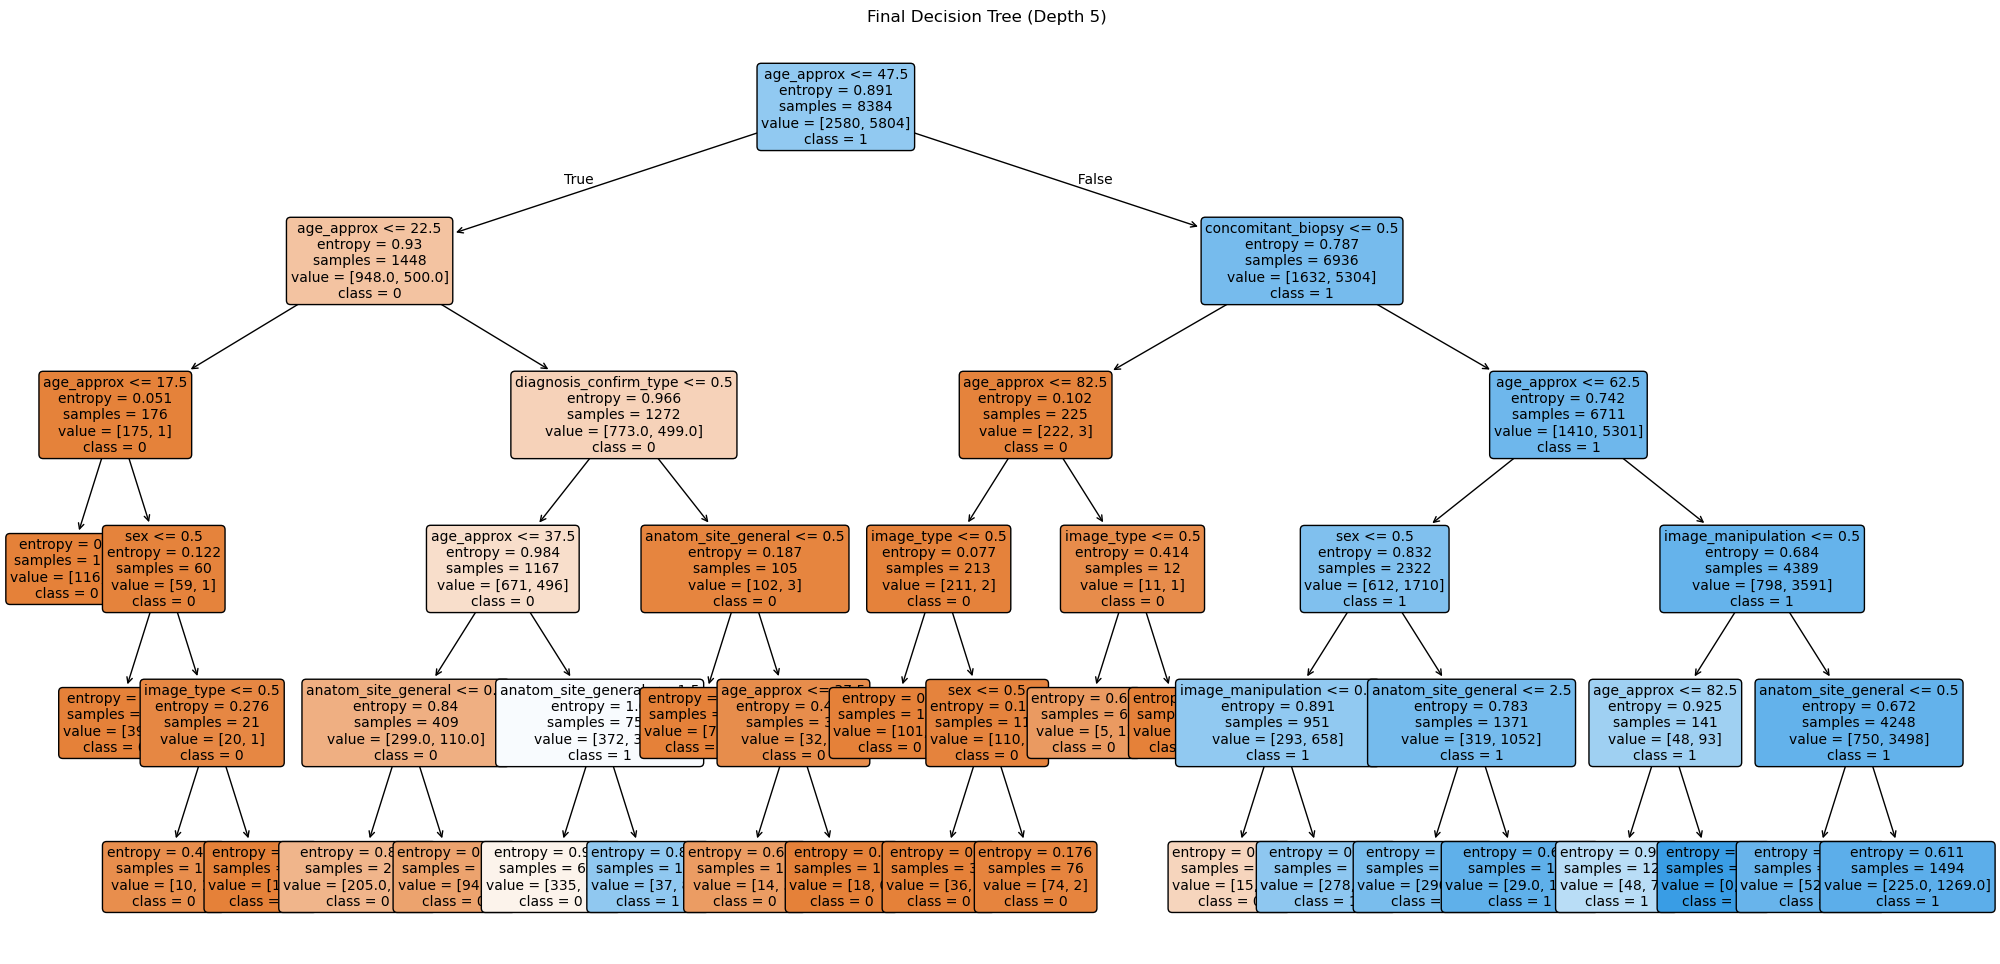

In [23]:
plt.figure(figsize=(25, 12)) 
plot_tree(
    model, 
    feature_names=X.columns, 
    class_names=['0', '1'],  
    filled=True, 
    rounded=True, 
    fontsize=10
)
plt.title("Final Decision Tree (Depth 5)")
plt.show()

In [ ]:
# CNN

In [1]:
import cv2
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

c:\Users\LOQ\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
df = pd.read_csv("Image_data.csv")  

In [3]:
IMG_SIZE = 128
images = []
labels = []
print(f"Total images to load: {len(df)}")
for i, row in df.iterrows():
    img_path = row['image_path']
    img = cv2.imread(img_path)
    if img is None:
        print(f"Could not read image: {img_path}")
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    images.append(img)
    labels.append(row['target'])
    if i % 1000 == 0:
        print(f"Processed {i}/{len(df)} images...")
images = np.array(images, dtype='float32')
labels = np.array(labels)
print("Images loaded. Shape:", images.shape)


Total images to load: 10480
Processed 0/10480 images...
Processed 1000/10480 images...
Processed 2000/10480 images...
Processed 3000/10480 images...
Processed 4000/10480 images...
Processed 5000/10480 images...
Processed 6000/10480 images...
Processed 7000/10480 images...
Processed 8000/10480 images...
Processed 9000/10480 images...
Processed 10000/10480 images...
Images loaded. Shape: (10480, 128, 128, 3)


In [4]:
images[0]

array([[[ 86.,  47.,  47.],
        [101.,  84., 100.],
        [117., 100., 119.],
        ...,
        [ 95.,  77.,  93.],
        [ 98.,  82.,  99.],
        [ 95.,  80.,  97.]],

       [[ 70.,  35.,  35.],
        [105.,  84., 100.],
        [122., 102., 122.],
        ...,
        [ 94.,  76.,  92.],
        [ 99.,  82., 100.],
        [ 92.,  75.,  93.]],

       [[ 57.,  26.,  31.],
        [109.,  87., 101.],
        [119.,  98., 115.],
        ...,
        [ 89.,  71.,  87.],
        [ 95.,  76.,  95.],
        [ 89.,  70.,  89.]],

       ...,

       [[ 95.,  62.,  71.],
        [ 73.,  40.,  47.],
        [ 90.,  58.,  61.],
        ...,
        [107.,  83.,  96.],
        [100.,  80.,  92.],
        [110.,  88., 104.]],

       [[ 71.,  39.,  41.],
        [ 78.,  46.,  52.],
        [ 95.,  62.,  73.],
        ...,
        [110.,  89., 101.],
        [105.,  86., 100.],
        [110.,  92., 108.]],

       [[ 65.,  34.,  32.],
        [ 77.,  43.,  43.],
        [ 83.,  

In [5]:
images = images / 255.0
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)
num_classes = len(np.unique(labels_encoded))
labels_onehot = keras.utils.to_categorical(labels_encoded, num_classes)
print("Number of classes:", num_classes)


Number of classes: 2


In [6]:
images[0]

array([[[0.3372549 , 0.18431373, 0.18431373],
        [0.39607844, 0.32941177, 0.39215687],
        [0.45882353, 0.39215687, 0.46666667],
        ...,
        [0.37254903, 0.3019608 , 0.3647059 ],
        [0.38431373, 0.32156864, 0.3882353 ],
        [0.37254903, 0.3137255 , 0.38039216]],

       [[0.27450982, 0.13725491, 0.13725491],
        [0.4117647 , 0.32941177, 0.39215687],
        [0.47843137, 0.4       , 0.47843137],
        ...,
        [0.36862746, 0.29803923, 0.36078432],
        [0.3882353 , 0.32156864, 0.39215687],
        [0.36078432, 0.29411766, 0.3647059 ]],

       [[0.22352941, 0.10196079, 0.12156863],
        [0.42745098, 0.34117648, 0.39607844],
        [0.46666667, 0.38431373, 0.4509804 ],
        ...,
        [0.34901962, 0.2784314 , 0.34117648],
        [0.37254903, 0.29803923, 0.37254903],
        [0.34901962, 0.27450982, 0.34901962]],

       ...,

       [[0.37254903, 0.24313726, 0.2784314 ],
        [0.28627452, 0.15686275, 0.18431373],
        [0.3529412 , 0

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    images, labels_onehot, test_size=0.2, random_state=42
)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (8384, 128, 128, 3)
y_train shape: (8384, 2)
X_test shape: (2096, 128, 128, 3)
y_test shape: (2096, 2)


In [8]:
model = Sequential([
    Conv2D(18, (3,3), activation='relu', padding='same', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax') 
])


c:\Users\LOQ\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 18)   │           504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 18)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        10,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,279,482 (16.32 MB)

 Trainable params: 4,279,482 (16.32 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=64,
    validation_data=(X_test, y_test)
)

Epoch 1/15
131/131 ━━━━━━━━━━━━━━━━━━━━ 21s 150ms/step - accuracy: 0.6898 - loss: 0.6148 - val_accuracy: 0.7452 - val_loss: 0.5500
Epoch 2/15
131/131 ━━━━━━━━━━━━━━━━━━━━ 18s 137ms/step - accuracy: 0.7209 - loss: 0.5614 - val_accuracy: 0.7505 - val_loss: 0.5093
Epoch 3/15
131/131 ━━━━━━━━━━━━━━━━━━━━ 18s 136ms/step - accuracy: 0.7377 - loss: 0.5439 - val_accuracy: 0.7605 - val_loss: 0.4984
Epoch 4/15
131/131 ━━━━━━━━━━━━━━━━━━━━ 19s 142ms/step - accuracy: 0.7440 - loss: 0.5367 - val_accuracy: 0.7700 - val_loss: 0.5021
Epoch 5/15
131/131 ━━━━━━━━━━━━━━━━━━━━ 19s 146ms/step - accuracy: 0.7525 - loss: 0.5233 - val_accuracy: 0.7739 - val_loss: 0.5040
Epoch 6/15
131/131 ━━━━━━━━━━━━━━━━━━━━ 19s 143ms/step - accuracy: 0.7547 - loss: 0.5191 - val_accuracy: 0.7777 - val_loss: 0.4792
Epoch 7/15
131/131 ━━━━━━━━━━━━━━━━━━━━ 39s 297ms/step - accuracy: 0.7657 - loss: 0.5113 - val_accuracy: 0.7748 - val_loss: 0.4822
Epoch 8/15
131/131 ━━━━━━━━━━━━━━━━━━━━ 57s 417ms/step - accuracy: 0.7671 - loss: 0

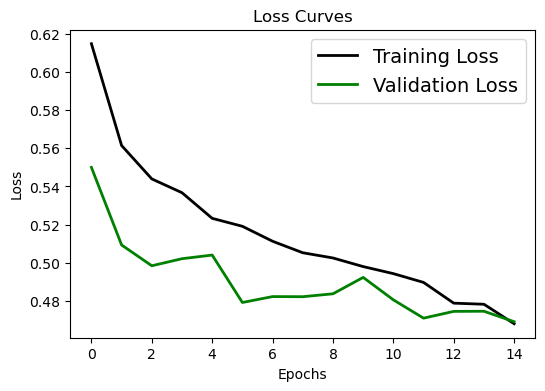

In [11]:
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)
plt.show()

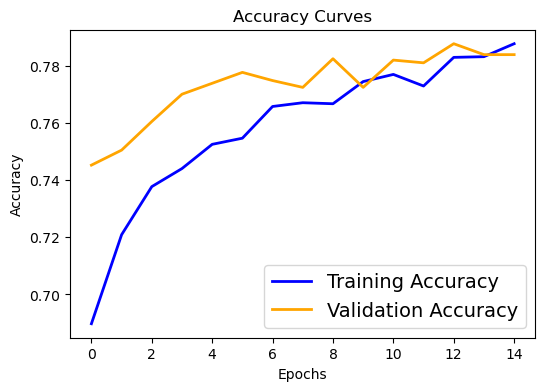

In [12]:
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'blue', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'orange', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)
plt.show()


In [ ]:
# df = pd.read_csv("Image_data.csv")  
# IMG_SIZE = 128

# images = []
# labels = []

# print(f"🚀 Total images to load: {len(df)}")

# for i, row in df.iterrows():
#     img_path = row['image_path']
#     img = cv2.imread(img_path)
#     if img is None:
#         print(f"⚠️ Could not read image: {img_path}")
#         continue
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
#     img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
#     images.append(img)
#     labels.append(row['target'])

#     if i % 50 == 0:
#         print(f"⏳ Processed {i}/{len(df)} images...")

# images = np.array(images, dtype='float32')
# labels = np.array(labels)

# print("✅ Images loaded. Shape:", images.shape)

# images = images / 255.0

# le = LabelEncoder()
# labels_encoded = le.fit_transform(labels)
# num_classes = len(np.unique(labels_encoded))
# labels_onehot = keras.utils.to_categorical(labels_encoded, num_classes)

# X_train, X_test, y_train, y_test = train_test_split(
#     images, labels_onehot, test_size=0.2, random_state=42
# )

# print("X_train shape:", X_train.shape)
# print("y_train shape:", y_train.shape)
# print("X_test shape:", X_test.shape)
# print("y_test shape:", y_test.shape)
